# LOGISTIC REGRESSION

In [10]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=222)

In [16]:
model2 = DecisionTreeRegressor(max_depth=12, min_samples_split=30, random_state=666)

In [17]:
results = []

for min_samples_split in range(50, 500):
    model2 = DecisionTreeRegressor(max_depth=12, min_samples_split=30, random_state=666)
    model2.fit(X_train, y_train)
    
    result = {
        "model2": model2,
        "depth": depth,
        "train_error": mean_squared_error(y_train, model2.predict(X_train)),
        "test_error": mean_squared_error(y_test, model2.predict(X_test))
    }
    
    results.append(result)

In [18]:
results_df = pd.DataFrame(results)

In [19]:
results_df.head(20)

,model2,depth,train_error,test_error
0,"DecisionTreeRegressor(max_depth=12, min_sample...",29,0.008531,0.013688
1,"DecisionTreeRegressor(max_depth=12, min_sample...",29,0.008531,0.013688
2,"DecisionTreeRegressor(max_depth=12, min_sample...",29,0.008531,0.013688
3,"DecisionTreeRegressor(max_depth=12, min_sample...",29,0.008531,0.013688
4,"DecisionTreeRegressor(max_depth=12, min_sample...",29,0.008531,0.013688
5,"DecisionTreeRegressor(max_depth=12, min_sample...",29,0.008531,0.013688
6,"DecisionTreeRegressor(max_depth=12, min_sample...",29,0.008531,0.013688
7,"DecisionTreeRegressor(max_depth=12, min_sample...",29,0.008531,0.013688
8,"DecisionTreeRegressor(max_depth=12, min_sample...",29,0.008531,0.013688
9,"DecisionTreeRegressor(max_depth=12, min_sample...",29,0.008531,0.013688


In [20]:
results_df.test_error.min()

0.013688239802922175

In [21]:
# Selecting the grid search

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
gs = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [16,14,15],
        "min_samples_split": [20, 30, 40],
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [24]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END max_depth=16, min_samples_split=20;, score=(train=-0.006, test=-0.013) total time=   0.1s
[CV 2/5] END max_depth=16, min_samples_split=20;, score=(train=-0.006, test=-0.013) total time=   0.1s
[CV 3/5] END max_depth=16, min_samples_split=20;, score=(train=-0.006, test=-0.013) total time=   0.1s
[CV 4/5] END max_depth=16, min_samples_split=20;, score=(train=-0.006, test=-0.014) total time=   0.1s
[CV 5/5] END max_depth=16, min_samples_split=20;, score=(train=-0.006, test=-0.013) total time=   0.1s
[CV 1/5] END max_depth=16, min_samples_split=30;, score=(train=-0.007, test=-0.013) total time=   0.1s
[CV 2/5] END max_depth=16, min_samples_split=30;, score=(train=-0.007, test=-0.013) total time=   0.1s
[CV 3/5] END max_depth=16, min_samples_split=30;, score=(train=-0.007, test=-0.013) total time=   0.1s
[CV 4/5] END max_depth=16, min_samples_split=30;, score=(train=-0.007, test=-0.014) total time=   0.1s
[CV 5/5] END 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [16, 14, 15],
                         'min_samples_split': [20, 30, 40]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [25]:
grid_search_results = pd.DataFrame(gs.cv_results_)
# we only keep some of the information
grid_search_results = grid_search_results[['param_max_depth', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]

In [26]:
grid_search_results.sort_values("mean_test_score", ascending=False)

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
3,14,20,-0.013031,-0.006257
4,14,30,-0.013031,-0.007344
1,16,30,-0.013046,-0.006938
6,15,20,-0.013047,-0.005844
0,16,20,-0.013051,-0.005600
7,15,30,-0.013051,-0.007076
8,15,40,-0.013371,-0.008169
2,16,40,-0.013401,-0.008083
5,14,40,-0.013434,-0.008355


In [27]:
best_tree = gs.best_estimator_

In [28]:
best_tree

DecisionTreeRegressor(max_depth=14, min_samples_split=20)

In [29]:
# Best tree
DecisionTreeRegressor(max_depth=14, min_samples_split=30)


DecisionTreeRegressor(max_depth=14, min_samples_split=30)

In [30]:
model3 = DecisionTreeRegressor(max_depth=14, min_samples_split=30)

In [31]:
test_real = pd.read_csv("Data/test.csv")

In [32]:
model3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=14, min_samples_split=30)

In [33]:
mean_squared_error(y_test, model3.predict(X_test)) ** 0.5

0.11446391912482663

In [34]:
transfromar_a_categoricas(test_real).head(1)

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.32,5,2,3,60.5,58.0,4.43,4.49,2.7


In [35]:
test_real_sin_indice = test_real[['carat','cut','color','clarity','depth','table','x','y','z']]

In [36]:
test_real_sin_indice

,carat,cut,color,clarity,depth,table,x,y,z
0,0.32,5,2,3,60.5,58.0,4.43,4.49,2.70
1,1.24,4,2,3,62.9,60.0,6.80,6.74,4.26
2,1.66,4,7,3,62.0,59.0,7.55,7.60,4.70
3,0.75,4,7,2,60.6,56.0,5.94,5.90,3.59
4,1.50,2,6,2,64.8,55.0,7.26,7.15,4.67
...,...,...,...,...,...,...,...,...,...
13480,1.10,4,4,3,59.6,60.0,6.74,6.70,4.00
13481,0.90,3,7,3,62.1,60.0,6.14,6.20,3.83
13482,0.30,5,5,4,62.1,53.3,4.30,4.32,2.68
13483,1.25,5,2,3,59.6,59.0,7.01,7.09,4.20


In [37]:
a = model3.predict(test_real_sin_indice)

In [38]:
type(a)

numpy.ndarray

In [39]:
submission3 = pd.DataFrame(test_real.id )

In [40]:
submission3['price'] = a.tolist()

In [41]:
submission3

,id,price
0,0,6.122765
1,1,8.552550
2,2,9.559963
3,3,7.808389
4,4,8.913655
...,...,...
13480,13480,8.544800
13481,13481,8.386018
13482,13482,6.410000
13483,13483,8.749750


In [42]:
a = submission3.set_index('id',drop=True, append=False, inplace=False, verify_integrity=False)

In [43]:
!pwd

/Users/jaimecabanyes/Desktop/IRON_HACK/Trabajos IH/Diamond_Competition


In [44]:
a

,price
id,
0,6.122765
1,8.552550
2,9.559963
3,7.808389
4,8.913655
...,...
13480,8.544800
13481,8.386018
13482,6.410000


In [201]:
a.to_csv("Data/submission3.csv")

# REGRESION LOGISTICA

In [242]:
dtrain.head(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183


In [241]:
dtrain = pd.read_csv("Data/train.csv")

In [243]:
len(dtrain.price.unique())

3512

In [244]:
dtrain.price.max()

9.842

In [245]:
dtrain.price.min()

5.787

<AxesSubplot:xlabel='price', ylabel='Count'>

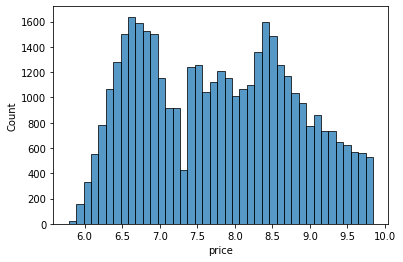

In [246]:
sns.histplot(dtrain.price)

In [247]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [248]:
dtrain['cut'] = le.fit_transform(dtrain["cut"])

In [249]:
dtrain['color'] = le.fit_transform(dtrain["color"])

In [250]:
dtrain['clarity'] = le.fit_transform(dtrain["clarity"])


In [251]:
dtrain

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,3,0,3,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,2,1,7,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,2,2,5,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,4,3,3,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,3,3,4,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,3,0,3,62.1,59.0,4.78,4.82,2.98,6.551
40451,40451,0.53,3,3,5,62.0,58.0,5.21,5.18,3.22,7.382
40452,40452,0.80,1,3,3,62.8,58.0,5.86,5.90,3.69,7.768
40453,40453,1.01,4,2,5,61.5,57.0,6.40,6.48,3.96,8.726


In [252]:
dtrain.drop(['id'], axis=1, inplace=True)

In [253]:
dtrain.describe()
    

,carat,cut,color,clarity,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797576,2.550192,2.591917,3.838858,61.746377,57.451694,5.729163,5.732896,3.537351,7.783822
std,0.475939,1.026107,1.703529,1.721116,1.436796,2.234569,1.125244,1.154799,0.711002,1.016828
min,0.200000,0.000000,0.000000,0.000000,43.000000,44.000000,0.000000,0.000000,0.000000,5.787000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,4.710000,4.720000,2.910000,6.851000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,5.690000,5.700000,3.520000,7.780000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.030000,8.581000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,10.740000,58.900000,31.800000,9.842000


In [254]:
from sklearn.preprocessing import StandardScaler

In [255]:
scaler = StandardScaler()

In [256]:
dtrain

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,3,0,3,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,2,1,7,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,2,2,5,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,4,3,3,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,3,3,4,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...,...,...
40450,0.42,3,0,3,62.1,59.0,4.78,4.82,2.98,6.551
40451,0.53,3,3,5,62.0,58.0,5.21,5.18,3.22,7.382
40452,0.80,1,3,3,62.8,58.0,5.86,5.90,3.69,7.768
40453,1.01,4,2,5,61.5,57.0,6.40,6.48,3.96,8.726


In [222]:
from sklearn.preprocessing import MinMaxScaler

In [257]:
min_max = MinMaxScaler()

In [224]:
dtrain.cut.values.reshape(-1, 1).shape

(40455, 1)

In [258]:
dtrain["cut"] = min_max.fit_transform(dtrain["cut"].values.reshape(-1, 1))

In [259]:
dtrain

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,0.75,0,3,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,0.50,1,7,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,0.50,2,5,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,1.00,3,3,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,0.75,3,4,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...,...,...
40450,0.42,0.75,0,3,62.1,59.0,4.78,4.82,2.98,6.551
40451,0.53,0.75,3,5,62.0,58.0,5.21,5.18,3.22,7.382
40452,0.80,0.25,3,3,62.8,58.0,5.86,5.90,3.69,7.768
40453,1.01,1.00,2,5,61.5,57.0,6.40,6.48,3.96,8.726


In [260]:
dtrain.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797576,0.637548,2.591917,3.838858,61.746377,57.451694,5.729163,5.732896,3.537351,7.783822
std,0.475939,0.256527,1.703529,1.721116,1.436796,2.234569,1.125244,1.154799,0.711002,1.016828
min,0.200000,0.000000,0.000000,0.000000,43.000000,44.000000,0.000000,0.000000,0.000000,5.787000
25%,0.400000,0.500000,1.000000,2.000000,61.000000,56.000000,4.710000,4.720000,2.910000,6.851000
50%,0.700000,0.500000,3.000000,4.000000,61.800000,57.000000,5.690000,5.700000,3.520000,7.780000
75%,1.040000,0.750000,4.000000,5.000000,62.500000,59.000000,6.540000,6.540000,4.030000,8.581000
max,5.010000,1.000000,6.000000,7.000000,79.000000,95.000000,10.740000,58.900000,31.800000,9.842000


In [228]:
#dtrain["carat"] = min_max.fit_transform(dtrain["carat"].values.reshape(-1, 1))

In [229]:
#dtrain["color"] = min_max.fit_transform(dtrain["color"].values.reshape(-1, 1))

In [230]:
#dtrain["clarity"] = min_max.fit_transform(dtrain["clarity"].values.reshape(-1, 1))

In [231]:
#dtrain["depth"] = min_max.fit_transform(dtrain["depth"].values.reshape(-1, 1))

In [232]:
#dtrain["table"] = min_max.fit_transform(dtrain["table"].values.reshape(-1, 1))

In [233]:
#dtrain["x"] = min_max.fit_transform(dtrain["x"].values.reshape(-1, 1))

In [234]:
#dtrain["y"] = min_max.fit_transform(dtrain["y"].values.reshape(-1, 1))

In [235]:
#dtrain["z"] = min_max.fit_transform(dtrain["z"].values.reshape(-1, 1))

In [236]:
#dtrain["price"] = min_max.fit_transform(dtrain["price"].values.reshape(-1, 1))

In [261]:
dtrain

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,0.75,0,3,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,0.50,1,7,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,0.50,2,5,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,1.00,3,3,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,0.75,3,4,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...,...,...
40450,0.42,0.75,0,3,62.1,59.0,4.78,4.82,2.98,6.551
40451,0.53,0.75,3,5,62.0,58.0,5.21,5.18,3.22,7.382
40452,0.80,0.25,3,3,62.8,58.0,5.86,5.90,3.69,7.768
40453,1.01,1.00,2,5,61.5,57.0,6.40,6.48,3.96,8.726


In [263]:
dtrain.drop(['cut'], axis=1, inplace=True)

In [264]:
dtrain.drop(['depth'], axis=1, inplace=True)

In [265]:
dtrain

,carat,color,clarity,table,x,y,z,price
0,0.30,0,3,58.0,4.31,4.28,2.68,6.353
1,1.01,1,7,56.0,6.42,6.46,4.04,9.183
2,0.72,2,5,59.0,5.71,5.74,3.54,7.983
3,1.08,3,3,57.0,6.54,6.50,4.12,8.371
4,0.36,3,4,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...
40450,0.42,0,3,59.0,4.78,4.82,2.98,6.551
40451,0.53,3,5,58.0,5.21,5.18,3.22,7.382
40452,0.80,3,3,58.0,5.86,5.90,3.69,7.768
40453,1.01,2,5,57.0,6.40,6.48,3.96,8.726


In [266]:
X = dtrain.drop("price", axis=1)

In [267]:
y = dtrain.price

In [268]:
X.head(1)

,carat,color,clarity,table,x,y,z
0,0.3,0,3,58.0,4.31,4.28,2.68


In [269]:
y.head(1)

0    6.353
Name: price, dtype: float64

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [276]:
gs = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [16, 14, 15],
        "min_samples_split": [26, 24, 25],
    },
    cv=5,
    verbose=3,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

In [277]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END max_depth=16, min_samples_split=26;, score=(train=-0.007, test=-0.014) total time=   0.1s
[CV 2/5] END max_depth=16, min_samples_split=26;, score=(train=-0.007, test=-0.013) total time=   0.1s
[CV 3/5] END max_depth=16, min_samples_split=26;, score=(train=-0.007, test=-0.014) total time=   0.1s
[CV 4/5] END max_depth=16, min_samples_split=26;, score=(train=-0.007, test=-0.012) total time=   0.1s
[CV 5/5] END max_depth=16, min_samples_split=26;, score=(train=-0.007, test=-0.014) total time=   0.1s
[CV 1/5] END max_depth=16, min_samples_split=24;, score=(train=-0.007, test=-0.014) total time=   0.1s
[CV 2/5] END max_depth=16, min_samples_split=24;, score=(train=-0.007, test=-0.013) total time=   0.1s
[CV 3/5] END max_depth=16, min_samples_split=24;, score=(train=-0.007, test=-0.014) total time=   0.1s
[CV 4/5] END max_depth=16, min_samples_split=24;, score=(train=-0.007, test=-0.012) total time=   0.1s
[CV 5/5] END 

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [16, 14, 15],
                         'min_samples_split': [26, 24, 25]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [278]:
grid_search_results = pd.DataFrame(gs.cv_results_)
# we only keep some of the information
grid_search_results = grid_search_results[['param_max_depth', 'param_min_samples_split',
       'mean_test_score', 'mean_train_score']]

In [279]:
grid_search_results.sort_values("mean_test_score", ascending=False)

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
7,15,24,-0.013369,-0.006914
2,16,25,-0.013394,-0.006811
0,16,26,-0.013428,-0.006945
8,15,25,-0.013439,-0.007033
1,16,24,-0.013449,-0.006681
6,15,26,-0.013461,-0.007158
4,14,24,-0.013480,-0.007366
5,14,25,-0.013493,-0.007474
3,14,26,-0.013554,-0.007583


In [282]:
best_tree = gs.best_estimator_

In [283]:
best_tree

DecisionTreeRegressor(max_depth=15, min_samples_split=24)

In [290]:
mean_squared_error(best_tree.predict(X_train), y_train)*0.5

0.003392893550767352

In [291]:
test_real = pd.read_csv("Data/test.csv")

In [292]:
test_real = test_real[['carat', 'color', 'clarity', 'table', 'x', 'y','z']]

In [293]:
test_real

,carat,color,clarity,table,x,y,z
0,0.32,I,SI1,58.0,4.43,4.49,2.70
1,1.24,I,SI1,60.0,6.80,6.74,4.26
2,1.66,D,SI1,59.0,7.55,7.60,4.70
3,0.75,D,SI2,56.0,5.94,5.90,3.59
4,1.50,E,SI2,55.0,7.26,7.15,4.67
...,...,...,...,...,...,...,...
13480,1.10,G,SI1,60.0,6.74,6.70,4.00
13481,0.90,D,SI1,60.0,6.14,6.20,3.83
13482,0.30,F,VS2,53.3,4.30,4.32,2.68
13483,1.25,I,SI1,59.0,7.01,7.09,4.20


In [294]:
def transfromar_a_categoricas(df):
    df.clarity = df.clarity.map(clrarity_ranking)
    df.color = df.color.map(color_ranking)
    return df
    
    

In [295]:
transfromar_a_categoricas(test_real)

,carat,color,clarity,table,x,y,z
0,0.32,2,3,58.0,4.43,4.49,2.70
1,1.24,2,3,60.0,6.80,6.74,4.26
2,1.66,7,3,59.0,7.55,7.60,4.70
3,0.75,7,2,56.0,5.94,5.90,3.59
4,1.50,6,2,55.0,7.26,7.15,4.67
...,...,...,...,...,...,...,...
13480,1.10,4,3,60.0,6.74,6.70,4.00
13481,0.90,7,3,60.0,6.14,6.20,3.83
13482,0.30,5,4,53.3,4.30,4.32,2.68
13483,1.25,2,3,59.0,7.01,7.09,4.20


In [174]:
#test_real["carat"] = min_max.fit_transform(test_real["carat"].values.reshape(-1, 1))

In [175]:
#test_real["color"] = min_max.fit_transform(test_real["color"].values.reshape(-1, 1))

In [176]:
#test_real["clarity"] = min_max.fit_transform(test_real["clarity"].values.reshape(-1, 1))

In [177]:
#test_real["table"] = min_max.fit_transform(test_real["table"].values.reshape(-1, 1))

In [178]:
#test_real["x"] = min_max.fit_transform(test_real["x"].values.reshape(-1, 1))

In [179]:
#test_real["y"] = min_max.fit_transform(test_real["y"].values.reshape(-1, 1))

In [180]:
#test_real["z"] = min_max.fit_transform(test_real["z"].values.reshape(-1, 1))

In [296]:
test_real

,carat,color,clarity,table,x,y,z
0,0.32,2,3,58.0,4.43,4.49,2.70
1,1.24,2,3,60.0,6.80,6.74,4.26
2,1.66,7,3,59.0,7.55,7.60,4.70
3,0.75,7,2,56.0,5.94,5.90,3.59
4,1.50,6,2,55.0,7.26,7.15,4.67
...,...,...,...,...,...,...,...
13480,1.10,4,3,60.0,6.74,6.70,4.00
13481,0.90,7,3,60.0,6.14,6.20,3.83
13482,0.30,5,4,53.3,4.30,4.32,2.68
13483,1.25,2,3,59.0,7.01,7.09,4.20


In [297]:
model11 = best_tree

In [298]:
model11

DecisionTreeRegressor(max_depth=15, min_samples_split=24)

In [299]:
a = model10.predict(test_real)

In [300]:
a

array([9.7123125, 9.379    , 9.379    , ..., 9.7123125, 9.379    ,
       9.379    ])

In [301]:
test_real_sub_11 = pd.read_csv("Data/test.csv")

In [302]:
test_real_sub_11

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.32,Ideal,I,SI1,60.5,58.0,4.43,4.49,2.70
1,1,1.24,Premium,I,SI1,62.9,60.0,6.80,6.74,4.26
2,2,1.66,Premium,D,SI1,62.0,59.0,7.55,7.60,4.70
3,3,0.75,Premium,D,SI2,60.6,56.0,5.94,5.90,3.59
4,4,1.50,Fair,E,SI2,64.8,55.0,7.26,7.15,4.67
...,...,...,...,...,...,...,...,...,...,...
13480,13480,1.10,Premium,G,SI1,59.6,60.0,6.74,6.70,4.00
13481,13481,0.90,Very Good,D,SI1,62.1,60.0,6.14,6.20,3.83
13482,13482,0.30,Ideal,F,VS2,62.1,53.3,4.30,4.32,2.68
13483,13483,1.25,Ideal,I,SI1,59.6,59.0,7.01,7.09,4.20


In [304]:
submission11= pd.DataFrame(test_real_sub_10.id)

In [305]:
submission11['price'] = a.tolist()

In [306]:
submission11

,id,price
0,0,9.712312
1,1,9.379000
2,2,9.379000
3,3,9.379000
4,4,9.379000
...,...,...
13480,13480,9.379000
13481,13481,9.379000
13482,13482,9.712312
13483,13483,9.379000


In [191]:
a = submission10.set_index('id',drop=True, append=False, inplace=False, verify_integrity=False)

In [192]:
a

,price
id,
0,7.638000
1,9.555267
2,9.530217
3,7.638000
4,9.794250
...,...
13480,9.555267
13481,7.638000
13482,7.638000


In [193]:
a.to_csv("Data/submission11.csv")